In [1]:
import mne as mne
import numpy as np
import pandas as pd
import torch as torch
import time
from tqdm import tqdm

from preprocessing import Preprocessing

In [2]:
labels = pd.read_csv('/home/dhz/bci-data/ds003478-download/participants.tsv', sep='\t', header=0)
col = labels.columns
col = col[[0, 1, 2, 3, 5, 6, 7, 8]]
labels = labels.drop(col, axis=1)

labels = np.array(labels)

labels[37] = 0.

In [3]:
train_data = []
for i in range(30):
    train_data.append(Preprocessing(i + 1).getData())

train_data = np.array(train_data)
train_labels = labels[0 : 30]

Reading /home/dhz/bci-data/ds003478-download/sub-001/eeg/sub-001_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'keyboard0']
Reading 0 ... 33201  =      0.000 ...    66.402 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.302 sec)

Fitting ICA to data using 64 channels (please be patient, this may take a while)


/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Selecting by number: 13 components
Fitting ICA took 0.7s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-002/eeg/sub-002_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'keyboard0']
Reading 0 ... 33201  =      0.000 ...    66.402 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.302

/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Selecting by number: 13 components
Fitting ICA took 0.6s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-003/eeg/sub-003_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'boundary', 'keyboard0']
Reading 0 ... 33201  =      0.000 ...    66.402 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 sa

/home/dhz/experiment-BCI/preprocessing.py:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(self.file_dir)
/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1

Selecting by number: 13 components
Fitting ICA took 0.5s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-004/eeg/sub-004_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '255', '3', '4', '5', '6', 'keyboard0']
Reading 0 ... 33201  =      0.000 ...    66.402 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples

/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Selecting by number: 13 components
Fitting ICA took 0.5s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-005/eeg/sub-005_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'keyboard0']
Reading 0 ... 33199  =      0.000 ...    66.398 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.302

/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Selecting by number: 13 components
Fitting ICA took 0.5s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-006/eeg/sub-006_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '175', '2', '3', '4', '5', '6', 'keyboard0']
Reading 0 ... 33201  =      0.000 ...    66.402 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples

/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Selecting by number: 13 components
Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-007/eeg/sub-007_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'keyboard0']
Reading 0 ... 33201  =      0.000 ...    66.402 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.302

/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Selecting by number: 13 components
Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-008/eeg/sub-008_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'keyboard0']
Reading 0 ... 33200  =      0.000 ...    66.400 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.302

/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Selecting by number: 13 components
Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-009/eeg/sub-009_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'keyboard0']
Reading 0 ... 33200  =      0.000 ...    66.400 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.302

/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Selecting by number: 13 components
Fitting ICA took 0.8s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-010/eeg/sub-010_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'keyboard0']
Reading 0 ... 33201  =      0.000 ...    66.402 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.302

/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Selecting by number: 13 components
Fitting ICA took 0.8s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-011/eeg/sub-011_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'keyboard0']
Reading 0 ... 33200  =      0.000 ...    66.400 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.302

/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Selecting by number: 13 components
Fitting ICA took 0.6s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-012/eeg/sub-012_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '240', '3', '4', '5', '6', 'keyboard0']
Reading 0 ... 33200  =      0.000 ...    66.400 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples

/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Selecting by number: 13 components
Fitting ICA took 0.5s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-013/eeg/sub-013_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '255', '3', '4', '5', '6', 'keyboard0']
Reading 0 ... 33200  =      0.000 ...    66.400 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples

/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Selecting by number: 13 components
Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-014/eeg/sub-014_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'boundary', 'keyboard0']
Reading 0 ... 33201  =      0.000 ...    66.402 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 sa

/home/dhz/experiment-BCI/preprocessing.py:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(self.file_dir)
/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1

Selecting by number: 13 components
Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-015/eeg/sub-015_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'keyboard0']
Reading 0 ... 33205  =      0.000 ...    66.410 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.302

/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Selecting by number: 13 components
Fitting ICA took 0.5s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-016/eeg/sub-016_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '13', '14', '15', '16', '17', '3', '4', '5', '6', 'boundary', 'keyboard0']
Reading 0 ... 33201  =      0.000 ...    66.402 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.30

/home/dhz/experiment-BCI/preprocessing.py:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(self.file_dir)
/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1

Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.6s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-017/eeg/sub-017_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'boundary', 'keyboard0']
Reading 0 ... 33201  =      0.000 ...    66.402 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transit

/home/dhz/experiment-BCI/preprocessing.py:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(self.file_dir)
/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1

Selecting by number: 13 components
Fitting ICA took 0.5s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-018/eeg/sub-018_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '255', '3', '4', '5', '6', 'keyboard0']
Reading 0 ... 33201  =      0.000 ...    66.402 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples

/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Selecting by number: 13 components
Fitting ICA took 0.7s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-019/eeg/sub-019_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'boundary', 'keyboard0']
Reading 0 ... 33200  =      0.000 ...    66.400 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 sa

/home/dhz/experiment-BCI/preprocessing.py:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(self.file_dir)
/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1

Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 13 components


[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.2s finished


Fitting ICA took 0.8s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-020/eeg/sub-020_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'keyboard0']
Reading 0 ... 33201  =      0.000 ...    66.402 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.302 sec)

Fitting ICA to data using 64

/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Selecting by number: 13 components
Fitting ICA took 4.4s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-021/eeg/sub-021_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'boundary', 'keyboard0']
Reading 0 ... 33200  =      0.000 ...    66.400 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 sa

/home/dhz/experiment-BCI/preprocessing.py:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(self.file_dir)
/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1

Selecting by number: 13 components
Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-022/eeg/sub-022_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'boundary', 'keyboard0']
Reading 0 ... 33200  =      0.000 ...    66.400 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 sa

/home/dhz/experiment-BCI/preprocessing.py:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(self.file_dir)
/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1

Selecting by number: 13 components
Fitting ICA took 0.5s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-023/eeg/sub-023_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'boundary', 'keyboard0']
Reading 0 ... 33201  =      0.000 ...    66.402 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 sa

/home/dhz/experiment-BCI/preprocessing.py:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(self.file_dir)
/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1

Selecting by number: 13 components
Fitting ICA took 0.5s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-024/eeg/sub-024_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'boundary']
Reading 0 ... 33201  =      0.000 ...    66.402 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.302 

/home/dhz/experiment-BCI/preprocessing.py:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(self.file_dir)
/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1

Selecting by number: 13 components
Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-025/eeg/sub-025_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '240', '3', '4', '5', '6']
Reading 0 ... 33201  =      0.000 ...    66.402 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.302 sec)


/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Selecting by number: 13 components
Fitting ICA took 0.5s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-026/eeg/sub-026_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'boundary', 'keyboard0']
Reading 0 ... 33204  =      0.000 ...    66.408 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 sa

/home/dhz/experiment-BCI/preprocessing.py:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(self.file_dir)
/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1

Selecting by number: 13 components
Fitting ICA took 0.6s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-027/eeg/sub-027_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'boundary', 'keyboard0']
Reading 0 ... 33200  =      0.000 ...    66.400 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 sa

/home/dhz/experiment-BCI/preprocessing.py:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(self.file_dir)
/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1

Selecting by number: 13 components
Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-028/eeg/sub-028_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'boundary', 'keyboard0']
Reading 0 ... 33201  =      0.000 ...    66.402 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 sa

/home/dhz/experiment-BCI/preprocessing.py:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(self.file_dir)
/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1

Selecting by number: 13 components
Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-029/eeg/sub-029_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'boundary', 'keyboard0']
Reading 0 ... 33200  =      0.000 ...    66.400 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 sa

/home/dhz/experiment-BCI/preprocessing.py:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(self.file_dir)
/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1

Selecting by number: 13 components
Fitting ICA took 0.5s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-030/eeg/sub-030_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'keyboard0']
Reading 0 ... 33201  =      0.000 ...    66.402 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.302

/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Selecting by number: 13 components
Fitting ICA took 1.0s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components


In [4]:
from subDataset import subDataset

train_dataset = subDataset(train_data, train_labels)

In [5]:
import torch.utils.data.dataloader as DataLoader

train_loader = DataLoader.DataLoader(train_dataset,batch_size= 1, shuffle = False)

In [6]:
test_data = []
for i in range(10):
    test_data.append(Preprocessing(10 + i + 1).getData())

test_data = np.array(test_data)
test_labels = labels[30 : 40]

Reading /home/dhz/bci-data/ds003478-download/sub-011/eeg/sub-011_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'keyboard0']
Reading 0 ... 33200  =      0.000 ...    66.400 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.302 sec)

Fitting ICA to data using 64 channels (please be patient, this may take a while)


/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Selecting by number: 13 components
Fitting ICA took 0.5s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-012/eeg/sub-012_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '240', '3', '4', '5', '6', 'keyboard0']
Reading 0 ... 33200  =      0.000 ...    66.400 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples

/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Selecting by number: 13 components
Fitting ICA took 0.5s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-013/eeg/sub-013_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '255', '3', '4', '5', '6', 'keyboard0']
Reading 0 ... 33200  =      0.000 ...    66.400 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples

/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Selecting by number: 13 components
Fitting ICA took 0.6s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-014/eeg/sub-014_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'boundary', 'keyboard0']
Reading 0 ... 33201  =      0.000 ...    66.402 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 sa

/home/dhz/experiment-BCI/preprocessing.py:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(self.file_dir)
/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1

Selecting by number: 13 components
Fitting ICA took 0.5s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-015/eeg/sub-015_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'keyboard0']
Reading 0 ... 33205  =      0.000 ...    66.410 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.302

/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Selecting by number: 13 components
Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-016/eeg/sub-016_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '13', '14', '15', '16', '17', '3', '4', '5', '6', 'boundary', 'keyboard0']
Reading 0 ... 33201  =      0.000 ...    66.402 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.30

/home/dhz/experiment-BCI/preprocessing.py:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(self.file_dir)
/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1

Selecting by number: 13 components
Fitting ICA took 0.6s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-017/eeg/sub-017_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'boundary', 'keyboard0']
Reading 0 ... 33201  =      0.000 ...    66.402 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 sa

/home/dhz/experiment-BCI/preprocessing.py:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(self.file_dir)
/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1

Selecting by number: 13 components
Fitting ICA took 0.6s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-018/eeg/sub-018_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '255', '3', '4', '5', '6', 'keyboard0']
Reading 0 ... 33201  =      0.000 ...    66.402 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples

/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Selecting by number: 13 components
Fitting ICA took 0.6s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-019/eeg/sub-019_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'boundary', 'keyboard0']
Reading 0 ... 33200  =      0.000 ...    66.400 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 sa

/home/dhz/experiment-BCI/preprocessing.py:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(self.file_dir)
/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1

Selecting by number: 13 components
Fitting ICA took 0.6s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-020/eeg/sub-020_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'keyboard0']
Reading 0 ... 33201  =      0.000 ...    66.402 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.302

/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Selecting by number: 13 components
Fitting ICA took 3.8s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components


In [7]:
test_dataset = subDataset(test_data, test_labels)
test_loader = DataLoader.DataLoader(test_dataset,batch_size= 1, shuffle = False)

In [8]:
import torch
import torch.nn as nn

class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool1d(1)
        self.fc = nn.Sequential(
            nn.Linear(64, 16, bias=False),
            nn.ReLU(inplace=True),
            nn.Linear(16, 64, bias=False),
            nn.Sigmoid()
        )
        self.conv1= nn.Sequential(
            nn.Conv1d(
                in_channels=64,
                out_channels=32,
                kernel_size=5,
                stride=1,
                padding=2,
            ),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2),
        )
        self.conv2= nn.Sequential(
            nn.Conv1d(
                in_channels=32,
                out_channels=16,
                kernel_size=5,
                stride=1,
                padding=2,
            ),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2),
        )
        self.conv3= nn.Sequential(
            nn.Conv1d(
                in_channels=16,
                out_channels=8,
                kernel_size=5,
                stride=1,
                padding=2,
            ),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2),
        )
        self.conv4= nn.Sequential(
            nn.Conv1d(
                in_channels=8,
                out_channels=4,
                kernel_size=5,
                stride=1,
                padding=2,
            ),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2),
        )
        self.conv5= nn.Sequential(
            nn.Conv1d(
                in_channels=4,
                out_channels=2,
                kernel_size=5,
                stride=1,
                padding=2,
            ),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2),
        )
        self.conv6= nn.Sequential(
            nn.Conv1d(
                in_channels=2,
                out_channels=1,
                kernel_size=5,
                stride=1,
                padding=2,
            ),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2),
        )
        self.out=nn.Linear(16,1)

    def forward(self,x):
        attention = self.avg_pool(x)
        attention = self.fc(attention.reshape(1, 64)).unsqueeze(2).repeat(1, 1, 1024)
        x = x * attention
        x= self.conv1(x)
        x= self.conv2(x)
        x= self.conv3(x)
        x= self.conv4(x)
        x= self.conv5(x)
        x= self.conv6(x)
        output = self.out(x)
        return output.reshape((1, 1))

In [9]:
def accuracy(predictions,labels):
    criterion1 = torch.nn.MSELoss()
    MSE = criterion1(predictions, labels)
    return MSE,len(labels)

In [16]:
net=CNN()
net = net.cuda()

critertion=nn.MSELoss()

optimizer =torch.optim.Adam(net.parameters(),lr=0.001)

In [17]:
num_epoche = 50
loss_list = []
mse_list = []
for epoch in range(num_epoche):
    #保存当前epoch结果
    train_rights=0.
    losses = 0.
    pbar = tqdm(train_loader, total=len(train_data), leave=True, ncols=80)
    pbar.set_description(f'epoch {(epoch + 1)}/{num_epoche}')
    for batch_idx,(data,target) in enumerate(pbar):
        data = data.cuda()
        target = target.cuda()
        net.train() #更新权重参数
        output = net(data)
        loss = critertion(output, target)
        optimizer.zero_grad()
        loss.to(torch.float32)
        losses += loss.item()
        loss.backward()
        optimizer.step()
        
        pbar.set_postfix(loss = losses / (batch_idx + 1))
        
        if (batch_idx + 1) % len(train_data) == 0:
            mses = 0.
            for batch_id, (x, y) in enumerate(test_loader):
                x = x.cuda()
                y = y.cuda()
                pred = net(x)
                mse, length = accuracy(pred, y)
                mses += mse.item()
            pbar.set_postfix(loss = losses / (batch_idx + 1), mse = mses / len(test_data))
            mse_list.append(mses / len(test_data))
            loss_list.append(losses / (batch_idx + 1))

epoch 50/50: 100%|█████████| 30/30 [00:00<00:00, 98.90it/s, loss=3.75, mse=3.31]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


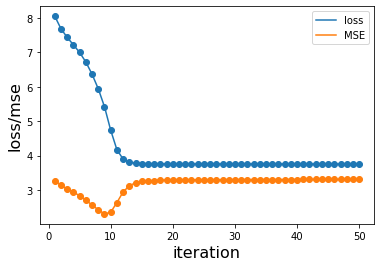

In [20]:
import matplotlib.pyplot as plt
iterate = range(1, num_epoche + 1)
plt.plot(iterate, loss_list)
plt.plot(iterate, mse_list)
plt.scatter(iterate, loss_list)
plt.scatter(iterate, mse_list)
plt.legend(loc='best')
plt.xlabel("iteration", fontdict={'size': 16})
plt.ylabel("loss/mse", fontdict={'size': 16})
plt.legend(['loss', 'MSE'])
plt.show()